In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df["total_spend"] = df["TV"] + df["radio"]+df["newspaper"]+df["sales"]
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,63.3
196,94.2,4.9,8.1,9.7,116.9
197,177.0,9.3,6.4,12.8,205.5
198,283.6,42.0,66.2,25.5,417.3


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

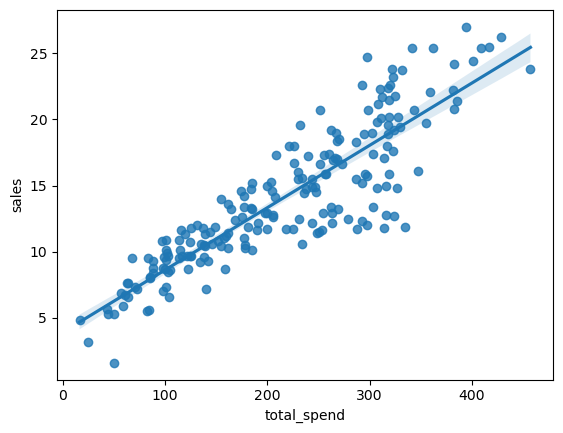

In [6]:
sns.regplot(data=df, x = "total_spend", y = "sales")

In [7]:
X = df["total_spend"]
y = df["sales"]

In [8]:
#help(np.polyfit)

In [13]:
np.polyfit(X,y,deg=3)

array([ 2.64617556e-07, -1.67427728e-04,  7.71590458e-02,  2.50495056e+00])

In [14]:
potential_spend = np.linspace(0,500,100)

In [15]:
predicted_sales = 0.04710145*potential_spend + 3.90119955

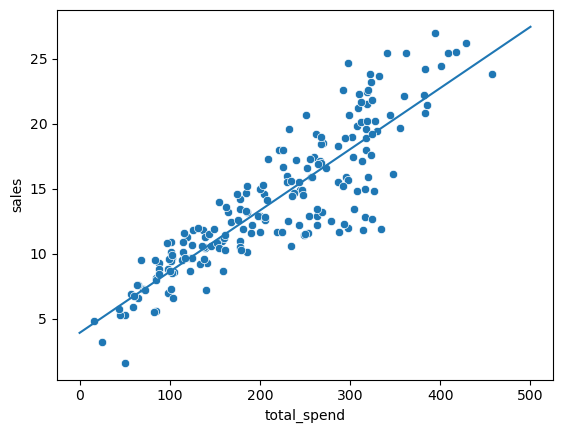

In [16]:
sns.scatterplot(data=df, x = "total_spend", y = "sales")
plt.plot(potential_spend,predicted_sales)

In [17]:
X = df.drop(["sales","total_spend"],axis=1)

In [18]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y = df["sales"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [22]:
len(df)

200

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
test_predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [27]:
mean_absolute_error(y_test,test_predictions)

1.4877038144084485

In [28]:
np.sqrt(mean_squared_error(y_test,test_predictions))

2.007972908038404

In [29]:
res = y_test - test_predictions

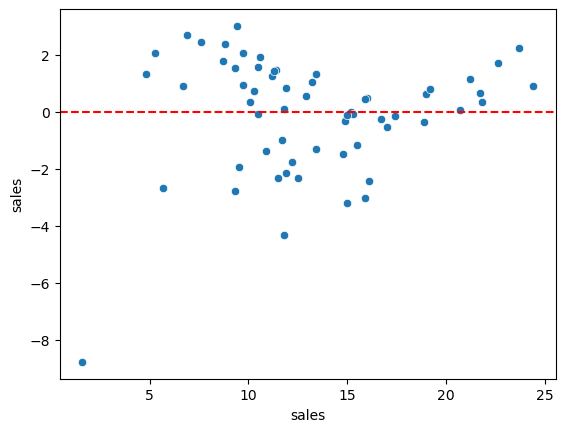

In [30]:
sns.scatterplot(x=y_test, y = res)
plt.axhline(y=0,color = "red", ls = "--")

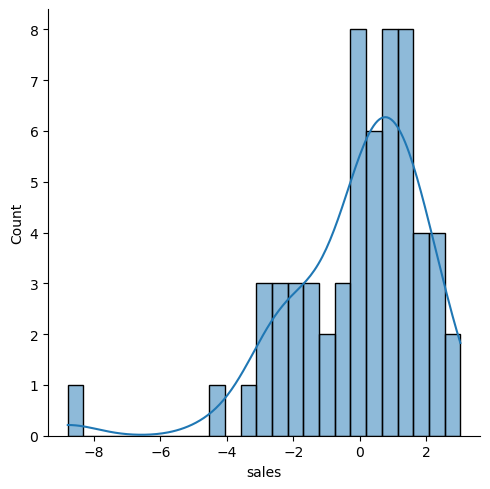

In [31]:
sns.displot(res, kde=True, bins=25)

In [32]:
final_model = LinearRegression()

In [33]:
final_model.fit(X,y)

LinearRegression()

In [34]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [35]:
y_hat = final_model.predict(X)

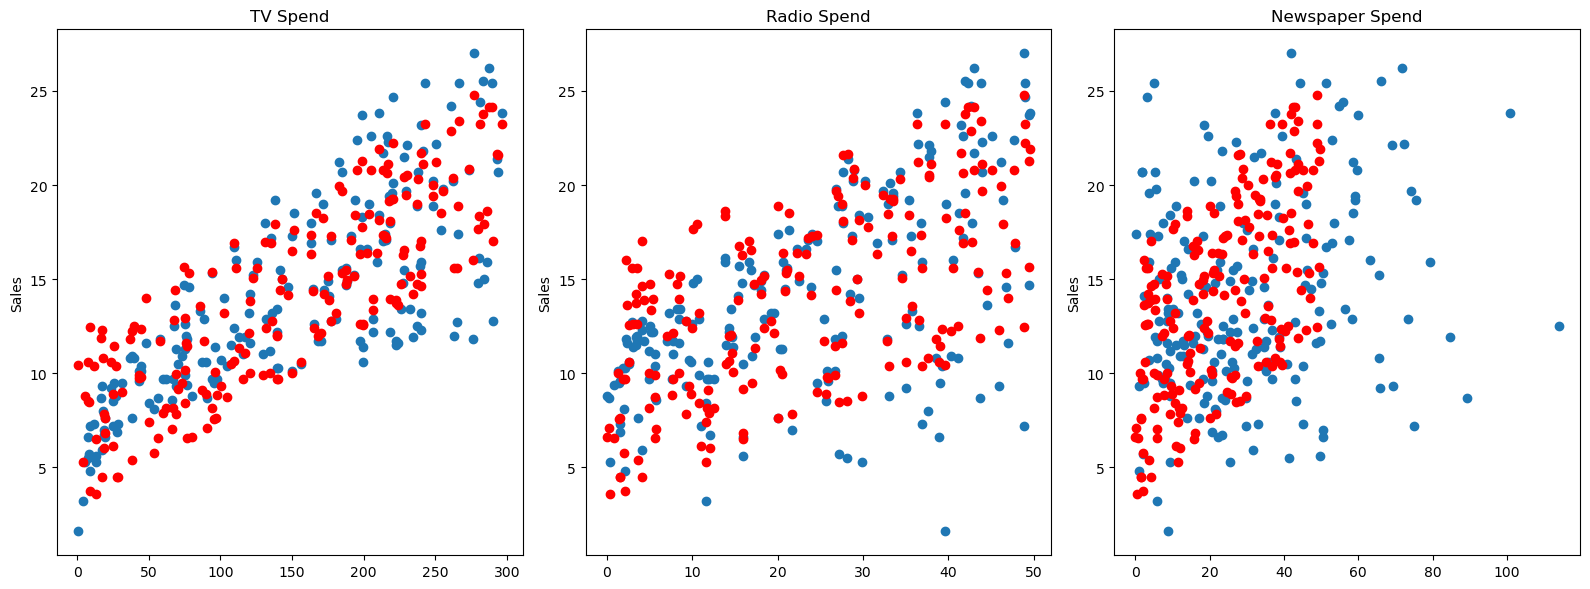

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [37]:
from joblib import dump,load

In [38]:
dump(final_model,"final_sales_model.joblib")

['final_sales_model.joblib']

In [39]:
loaded_model = load("final_sales_model.joblib")

In [40]:
campaign = [[149,22,12]]
loaded_model.predict(campaign)

D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

ValueError: x and y must be the same size

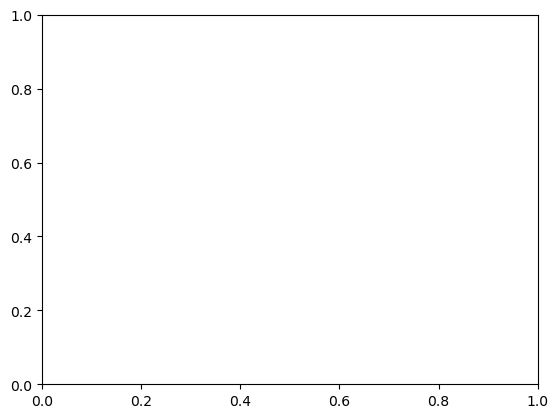

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_test,test_predictions)